# 定積分

関数$y=f(x)$のグラフを考える。$f(x)$は区間$a\leq x \leq b$で連続であり正であるとする。その曲線、$x=a, x=b$で囲まれた面積を$S$とする

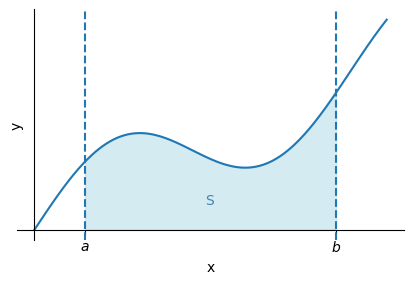

In [44]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 7, 300)
y = 0.5 * x + np.sin(x)
xticks = []
xticklabels = []

fig, ax = plt.subplots(figsize=[5,3])
ax.plot(x, y)

a = 1
ax.axvline(a, linestyle="--")
xticks.append(a)
xticklabels.append("$a$")

b = 6
ax.axvline(b, linestyle="--")
xticks.append(b)
xticklabels.append("$b$")

ax.set(xlabel="x", ylabel="y", xticks=xticks, xticklabels=xticklabels, yticks=[])
ax.fill_between(x[(a <= x) & (x <= b)], y[(a <= x) & (x <= b)], color='lightblue', alpha=0.5)
ax.text(a + 0.4 + (b - a) // 2, 0.5, "S", color="steelblue")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')

fig.show()

区間$a\leq x \leq b$を

$$
a=x_0<x_1<x_2<\cdots<x_{k-1}<x_k<\cdots<x_{n-1}<b=x_n
$$

であるような$n+1$個の点$x_0, x_1, x_2, \cdots, x_{n-1}, x_n$によって$n$個の小区間$I_1, I_2, \cdots, I_{n-1}, I_n$に分割する。小区間$I_k$の大きさは$\Delta x_k = x_k - x_{k-1}$である。

点$x_k$に$x$軸に垂直な直線をひくと、面積$S$は$n$個の「帯」に分けられる。
小区間の中の点を$\xi_k$とすると、「帯」の面積は底辺の長さが$\Delta x_k$で高さが$y_k=f(\xi_k)$の長方形の面積$f(\xi_k)\Delta x_k$で近似する。

このとき、求める面積$S$は長方形の面積の和

$$
S_n = \sum^n_{k=1} f(\xi_k)\Delta x_k
$$

で近似される。このような和を積和と呼ぶことにする。


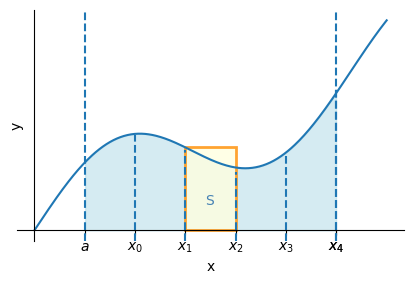

In [68]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 0.5 * x + np.sin(x)

x = np.linspace(0, 7, 300)
y = f(x)
xticks = []
xticklabels = []

fig, ax = plt.subplots(figsize=[5,3])
ax.plot(x, y)

a = 1
ax.axvline(a, linestyle="--")
xticks.append(a)
xticklabels.append("$a$")

b = 6
ax.axvline(b, linestyle="--")
xticks.append(b)
xticklabels.append("$b$")

ax.fill_between(x[(a <= x) & (x <= b)], y[(a <= x) & (x <= b)], color='lightblue', alpha=0.5)
ax.text(a + 0.4 + (b - a) // 2, 0.5, "S", color="steelblue")

# 「帯」
x_ks = [a + i for i in range(1, b)]
for k, x_k in enumerate(x_ks):
    ax.axvline(x_k, ymax=f(x_k) / max(y), linestyle="--")
    xticks.append(x_k)
    xticklabels.append(f"$x_{k}$")

# 長方形
import matplotlib.patches as patches
linesettings = dict(color="darkorange", alpha=0.7)
delta_x = x_ks[2] - x_ks[1]
rect = patches.Rectangle(
    xy=(x_ks[1], 0),
    width=delta_x,
    height=f(x_ks[1]),
    linewidth=2,
    edgecolor='darkorange',
    facecolor='lightyellow',
    alpha=0.8
)
ax.add_patch(rect)

# axis
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')

ax.set(xlabel="x", ylabel="y", xticks=xticks, xticklabels=xticklabels, yticks=[])
fig.show()

分割する小区間の長さ$\Delta_x$が限りなく小さくなるように細かく分割していくと、積和はある一定の値に限りなく近づく。その極限値（$f(x)$が連続なら必ず存在する）は面積$S$に等しい。

この極限値を

$$
\int_a^b f(x) d x=\lim _{n \rightarrow \infty} \sum_{k=1}^n f\left(\xi_k\right) \Delta x_k
$$

で表し、関数$f(x)$の$a$から$b$までの **定積分** （definite integral） という。$b$を積分上限、$a$を積分下限と呼ぶ。

### 負の面積

関数が負の場合をとる場合でも積分は定義できる。積和の定義より、関数の値が負の部分はその部分からの面積への寄与は負である。


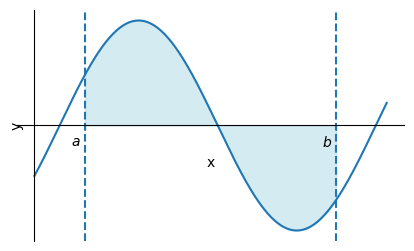

In [76]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 7, 300)
y = np.sin(x - 0.5)
xticks = []
xticklabels = []

fig, ax = plt.subplots(figsize=[5,3])
ax.plot(x, y)

a = 1
ax.axvline(a, linestyle="--")
xticks.append(a)
xticklabels.append("$a$     ")

b = 6
ax.axvline(b, linestyle="--")
xticks.append(b)
xticklabels.append("$b$     ")

ax.set(xlabel="x", ylabel="y", xticks=xticks, xticklabels=xticklabels, yticks=[])
ax.fill_between(x[(a <= x) & (x <= b)], y[(a <= x) & (x <= b)], color='lightblue', alpha=0.5)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')

fig.show()

## 定積分の性質

1. $\displaystyle \int_a^b\{f(x) \pm g(x)\} d x=\int_a^b f(x) d x \pm \int_a^b g(x) d x$
2. $\displaystyle \int_a^b k f(x) d x=k \int_a^b f(x) d x \quad(k$ : 定数 $)$
3. $\displaystyle a \leqq x \leqq b$ で $f(x) \geqq 0$ ならば $\int_a^b f(x) d x \geqq 0$
4. $\displaystyle \quad a \leqq x \leqq b$ で $f(x) \geqq g(x)$ ならば $\int_a^b f(x) d x \geqq \int_a^b g(x) d x$
5. 平均値の定理：$\displaystyle \int_a^b f(x) d x=f(c)(b-a) \quad(a<c<b)$

## 定積分の計算

$F'(x) = f(x)$を満たすある関数$F(x)$がわかったとき、定積分

$$
\int_a^b f(x) d x
$$

はどのように求められるか。


下限を定数、上限を変数とした$\int_a^x f(t) d t$も原始関数であるから、

$$
\int_a^x f(t) d t = F(x) + C
$$

が成り立つ。

上の式で$x=a$とおくと

$$
0 = F(a) + C
$$

なので

$$
\int_a^x f(t) d t = F(x) - F(a)
$$

であり、$x=b$とおくと

$$
\int_a^b f(t) d t=F(b)-F(a)
$$

すなわち、「定積分の値は、原始関数の積分上限での値$F(b)$から、下限での値$F(a)$を引いたもの」となる。




定積分を表す記号として

$$
[F(t)]_a^b=F(b)-F(a)
$$

や

$$
\int_a^b f(t) d t=[F(t)]_a^b
$$

や

$$
\int_a^b f(t) d t=\left.F(t)\right|_a ^b
$$

という記号が用いられる


:::{admonition} 定積分の計算
$$
\left. \int_a^b f(x) d x = F(x) \right|_a^b =F(b)-F(a)
$$
:::


## 広義積分

区間内で不連続点がある場合や、無限区間での積分へ拡張した定積分を **広義積分**（improper integral）という。

2種類ある

1. 被積分関数 $f(x)$ が区間 $a \leqq x \leqq b$ で有限個の不連続点を持つ.
2. 積分の上限, 下限の一方または両方が無限大である.

### 不連続な被積分関数

関数 $f(x)$ が区間 $a < x \leqq b$ で連続であるとき、もし極限

$$
\lim_{\varepsilon \rightarrow+0} \int_{a+\varepsilon}^b f(x) d x
$$

が存在するならば、 $f(x)$ は $a \leqq x \leqq b$ で積分可能であるといい、この極限値を

$$
\int_a^b f(x) d x
$$

で表わす。同様に、 $f(x)$ が $a \leqq x<b$ で連続であるとき（下の式の右辺が存在するならば）、

$$
\int_a^b f(x) d x=\lim _{\varepsilon \rightarrow+0} \int_a^{b-\varepsilon} f(x) d x
$$

と表わす。

いま $f(x)$ が $a \leqq x \leqq b$ 内の 1 点 $c$ を除いて連続であるならば（下の式の右辺 の 2 つの極限が存在すると仮定して）

$$
\int_a^b f(x) d x=\lim _{\varepsilon_1 \rightarrow+0} \int_a^{c-\varepsilon_1} f(x) d x+\lim _{\varepsilon_2 \rightarrow+0} \int_{c+\varepsilon_2}^b f(x) d x
$$

区間$a\leq x \leq b$ 内に有限個の不連続点が存在するならば、この区間をいくつかの部分区間に分けて、そのいずれにもただ 1 つの不連続点があるようにできるので、同様に扱うことができる。

上記のような極限が存在するとき、 **広義積分は収束する** という。

### 無限区間の積分

関数$f(x)$が$x\geq a$で連続であって、極限

$$
\lim _{b \rightarrow+\infty} \int_a^b f(x) d x
$$

が存在するならば、この極限値を

$$
\int_a^{\infty} f(x) d x
$$

で表わす。同様にして、

$$
\begin{aligned}
& \int_{-\infty}^b f(x) d x=\lim _{a \rightarrow-\infty} \int_a^b f(x) d x \\
& \int_{-\infty}^{\infty} f(x) d x=\lim _{a \rightarrow-\infty} \lim _{b \rightarrow \infty} \int_a^b f(x) d x
\end{aligned}
$$

が定義される。
